In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

warnings.filterwarnings('ignore')

__Задание 1:__ Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log

In [2]:
def calc_logloss(y_true: np.array, y_pred: np.array) -> float:
    """
    Вычисление значения функции Log-Loss.

    Parameters
    ----------
    y_true: np.array
        Вектор истинных ответов.

    y_pred: np.array
        Вектор прогнозов.

    Returns
    -------
    score: float
        Значение функции Log-Loss.

    """
    tol = 1e-5
    y_pred = y_pred.copy()
    y_pred = np.clip(y_pred, a_min=tol, a_max=1-tol)

    score = np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
    return -score

__Задание 2:__ Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [3]:
X = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
    [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
    [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]
])

y = np.array([
    0, 0, 1, 0, 1, 0, 1, 0, 1, 1
])

In [5]:
def calc_std_feat(x):
    x[1:] = ((x[1:].T - x[1:].mean(axis=1)) / x[1:].std(axis=1)).T
    return x

x = calc_std_feat(X)

In [17]:
x.std(axis=1)

array([0.        , 0.6       , 0.74833148, 0.4       ])

In [11]:
def calc_std_feat(X: np.array) -> np.array:
    """
    Масштабирование признаков методом стандартизации.
    Первый признак в датасете не масштабируется, т.к. он фиктивный.

    Parameters
    ----------
    X: np.array
        Матрица признаков.

    Returns
    -------
    X_transformed: np.array
        Масштабированная матрица признаков.

    """
    X_transformed = X[1:,].copy()
    X_mean, X_std = X_transformed.mean(axis=1), X_transformed.std(axis=1)
    X_mean, X_std = X_mean.reshape(X_transformed.shape[0], 1), X_std.reshape(X_transformed.shape[0], 1)

    X_transformed = (X_transformed - X_mean) / X_std
    X_transformed = np.vstack((
        np.ones(X_transformed.shape[1]), X_transformed
    ))
    return X_transformed


def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res


def eval_model(X, y, iterations, alpha=1e-4, tol=1e-5):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors, weights = [], []
    
    for n_iter in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        current_error = calc_logloss(y, y_pred)
        W = W - alpha * (1/n * np.dot((y_pred - y), X.T))
        
        errors.append(current_error)
        weights.append(W)
        
        if n_iter > 2 and np.abs(current_error - errors[-2]) < tol:
            break
    
    errors = np.array(errors)
    return errors, weights

def plot_fit_history(weights_history: np.array,
                     errors_history: np.array,
                     figsize=(15, 5)) -> None:
    """
    Визуализация процесса обучения линейной модели: визуализация
    изменения значения ошибки на каждой итерации обучения и
    визуализация изменения значения весов на каждой итерации
    обучения.

    Parameters
    ----------
    weights_history: List[np.array]
        Список с векторами весов на каждой итерации обучения.

    errors_history: List[float]
        Список со значением ошибки на каждой итерации обучения.

    figsize: Tuple[int, int], optional, default = (15, 5)
        Размер изображения графика. Опциональный параметр,
        по умолчанию равен (15, 5).

    """
    fig = plt.figure(figsize=(15, 5))
    plt.suptitle(
        f"Optional rounds: {len(errors_history)}, Error: {round(errors_history[-1], 2)}",
        size=15
    )
    plt.subplot(121)
    plt.plot(errors_history, linewidth=3)
    plt.xlabel("n_iterations", size=15)
    plt.ylabel("MSE", size=15)

    plt.subplot(122)
    plt.plot(weights_history, linewidth=3)
    plt.legend([f"$w_{i}$" for i in range(len(weights_history[0]))], loc="best", fontsize=15)
    plt.xlabel("n_iterations", size=15)
    plt.ylabel("w", size=15)

In [5]:
X = calc_std_feat(X)

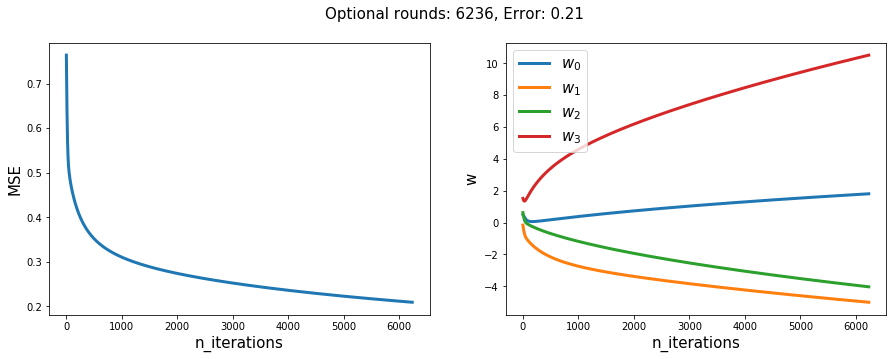

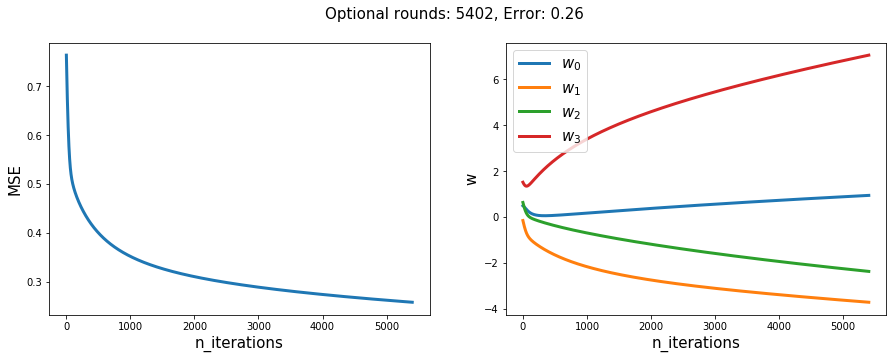

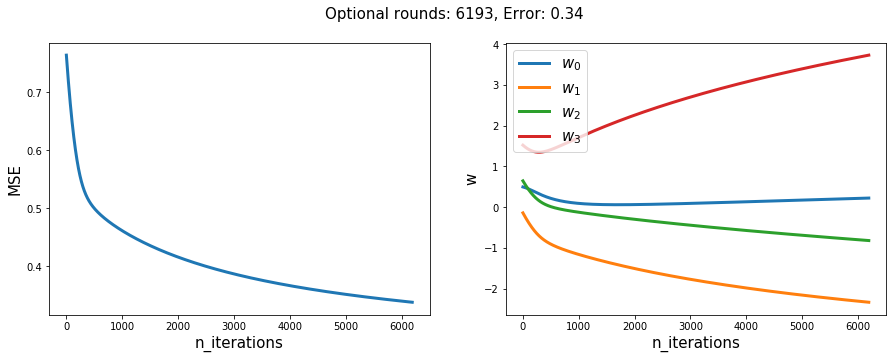

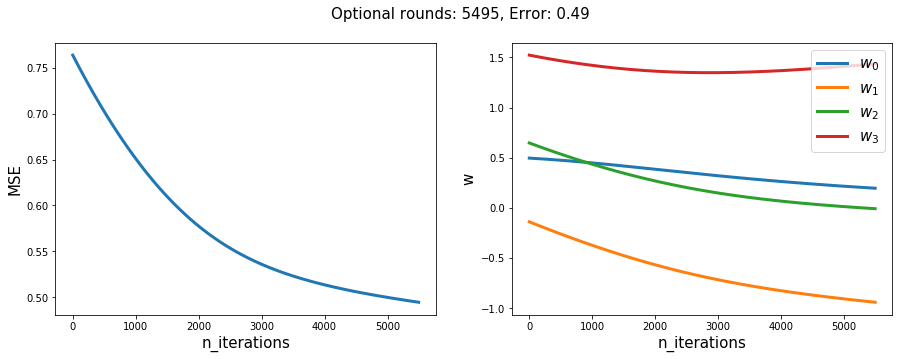

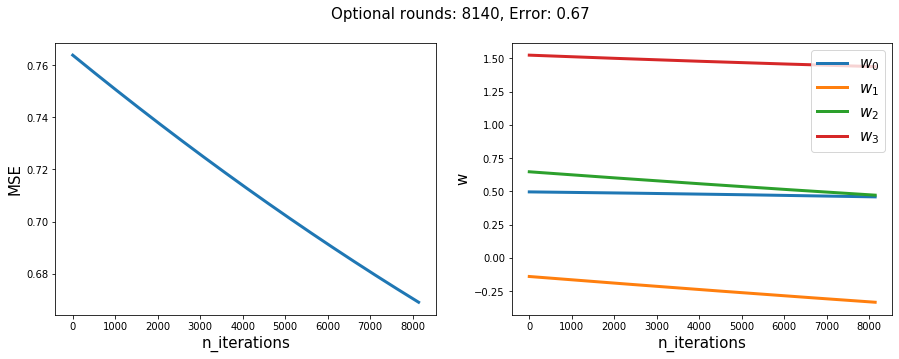

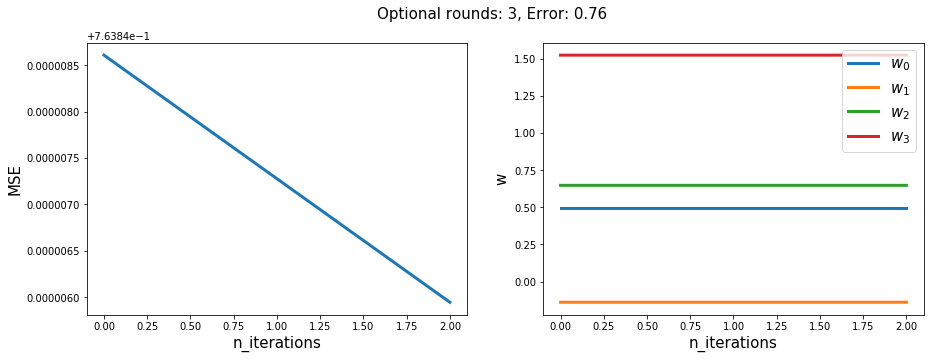

In [6]:
for alpha in [0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]:

    errors_history, weights_history = eval_model(
        X=X,
        y=y,
        iterations=1000000,
        alpha=alpha
    )
    plot_fit_history(
        weights_history, errors_history
    )

__Задание 3:__ Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [7]:
def calc_pred_proba(W: np.array, X: np.array) -> np.array:
    """
    Применение обученной модели логистической регрессии
    для матрицы признаков X, получение прогнозов модели.

    Parameters
    ----------
    W: np.array
        Веса обученной модели.

    X: np.array
        Матрица признаков.

    Returns
    -------
    y_pred: np.array
        Вектор прогнозов.

    """
    y_pred = 1 / (1 + np.exp(-np.dot(W, X)))

    return y_pred

In [8]:
calc_pred_proba(weights_history[-1], X)

array([0.19407261, 0.23928212, 0.69228391, 0.2158206 , 0.84506825,
       0.27415049, 0.97377553, 0.98262899, 0.18383967, 0.75854996])

__Задание 4:__ Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [9]:
def calc_pred(W, X, threshold: float = 0.5) -> np.array:
    """
    Применение обученной модели логистической регрессии
    для матрицы признаков Х, получение лейблов классов.

    Parameters
    ----------
    W: np.array
        Веса обученной модели.

    X: np.array
        Матрица признаков.

    threshold: float, optional, default = 0.5.
        Порог, при котором объект относится к целевому классу.
        Опциональный параметр, по умолчанию, равен 0.5.

    Returns
    -------
    y_pred: np.array
        Вектор прогнозов.

    """
    y_pred = calc_pred_proba(W, X)
    y_pred = np.where(y_pred > threshold, 1, 0)

    return y_pred

In [10]:
calc_pred(weights_history[-1], X)

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

__Задание 5:__ Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [11]:
def accuracy_score(y_true: np.array, y_pred: np.array) -> float:
    """
    Вычисление значения метрики Accuracy.

    Parameters
    ----------
    y_true: np.array
        Вектор истинных ответов.

    y_pred: np.array
        Вектор прогнозов.

    Returns
    -------
    score: float
        Значение метрики Accuracy.

    """
    mask = y_true == y_pred

    return sum(mask) / y_true.shape[0]


def confusion_matrix(y_true: np.array, y_pred: np.array):
    """
    Вычисление матрицы ошибок.
    Возвращаемые значения при плоском векторе: tn, fp, fn, tp.

    Parameters
    ----------
    y_true: np.array
        Вектор истинных ответов.

    y_pred: np.array
        Вектор прогнозов.

    Returns
    -------
    conf_matrix: np.array
        Матрица ошибок.

    """
    conf_matrix = np.zeros(shape=(2, 2))
    conf_matrix[0, 0] = np.sum(np.where(y_true == 0, y_pred == y_true, False))
    conf_matrix[1, 1] = np.sum(np.where(y_true == 1, y_pred == y_true, False))
    conf_matrix[1, 0] = np.sum(np.where(y_true == 1, y_pred != y_true, False))
    conf_matrix[0, 1] = len(y_true) - conf_matrix.sum()

    return conf_matrix.astype(int)

def precision_score(y_true: np.array, y_pred: np.array) -> float:
    """
    Вычисление значения метрики precision.
    # конверсия TP / (TP + FP)

    Parameters
    ----------
    y_true: np.array
        Вектор истинных ответов.

    y_pred: np.array
        Вектор прогнозов.

    Returns
    -------
    score: float
        Значение метрики precision.

    """
    _, fp, _, tp = confusion_matrix(y_true, y_pred).flatten()
    score = tp / (tp + fp)

    return score

def recall_score(y_true: np.array, y_pred: np.array) -> float:
    """
    Вычисление значения метрики recall.
    # доля ЦА TP / (TP + FN)

    Parameters
    ----------
    y_true: np.array
        Вектор истинных ответов.

    y_pred: np.array
        Вектор прогнозов.

    Returns
    -------
    score: float
        Значение метрики recall.

    """
    _, _, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    score = tp / (tp + fn)

    return score

def f1_score(y_true: np.array, y_pred: np.array, betta: float = 0.5) -> float:
    """
    Вычисление значения метрики F1.

    Parameters
    ----------
    y_true: np.array
        Вектор истинных ответов.

    y_pred: np.array
        Вектор прогнозов.

    betta: float
        Вес для регулирования важности между метриками precision / recall.
        Опциональный параметр, по умолчанию, равен 0.5.

    Returns
    -------
    score: float
        Значение метрики F1.

    """
    precision, recall = precision_score(y_true, y_pred), recall_score(y_true, y_pred)
    score = 2*precision*recall / (precision + recall)

    return score

__Задание 7:__ Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [12]:
def eval_model_with_regularization(X: np.array,
                                   y: np.array,
                                   iterations: int = 100000,
                                   alpha: float = 0.01,
                                   tol: float = 1e-5,
                                   c1: float = 0.,
                                   c2: float = 0.):
    """
    Модель логистической регрессии с L1-регуляризацией и L2-регуляризацией.

    Parameters
    ----------
    X: np.array
        Матрица признаков для обучения.

    y: np.array
        Вектор целевой переменной для обучения.

    alpha: float, optional, default = 0.01
        Скорость обучения. Опциональный параметр, по
        умолчанию, равен 0.01.

    iterations: int, optional, default = 100000
        Количество итераций обучения. Опциональный параметр,
        по умолчанию, равен 100000.

    tol: float, optional, default = 1e-5
        Минимальное значимое изменение ошибки, при котором
        обучение продолжается. Если изменение ошибки на соседних
        итерациях меньше указанной величины, то обучение прекращается.

    c1: float, optional, default = 0
        Коэффициент L1-регуляризации.
        Опциональный параметр, по умолчанию, равен 0.

    c2: float, optional, default = 0
        Коэффициент L2-регуляризации.
        Опциональный параметр, по умолчанию, равен 0.

    Returns
    -------
    weights: np.array
        Вектор весов линейной модели.

    weights_history: List[np.array]
        Список с векторами весов на каждой итерации обучения.

    errors_history: List[float]
        Список со значением ошибки на каждой итерации обучения.

    """
    
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors, weights = [], []
    
    for n_iter in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        current_error = calc_logloss(y, y_pred)
        W = W - alpha * (1/n * np.dot((y_pred - y), X.T)) + 2*c2*W + 0.5*c1*W/np.abs(W)
        
        errors.append(current_error)
        weights.append(W)
        
        if n_iter > 2 and np.abs(current_error - errors[-2]) < tol:
            break
    
    errors = np.array(errors)
    return errors, weights

In [17]:
params_grid = {
    "c": [100, 10, 1, 0.1, 0.01, 0.001],
    "learning_rate": [0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]
}
errors_history_params = []

for c in tqdm(params_grid["c"]):
    errors_by_c = []

    for lr in params_grid["learning_rate"]:
        errors_history, weights_history = eval_model_with_regularization(
            X=X,
            y=y,
            alpha=lr,
            c1=c
        )
        errors_by_c.append(np.min(errors_history))
    errors_history_params.append(errors_by_c)

100%|██████████| 6/6 [00:06<00:00,  1.05s/it]


In [24]:
scores_history = pd.DataFrame(
    errors_history_params,
    index=params_grid["learning_rate"],
    columns=params_grid["c"])

Text(51.0, 0.5, '$\\eta$')

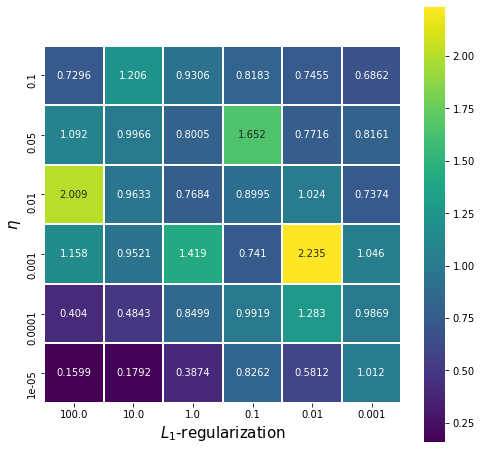

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
sns.heatmap(scores_history, cmap="viridis", annot=True, fmt='.4g', linewidths=1, square=True, ax=axes)
axes.set_xlabel("$L_1$-regularization", fontsize=15)
axes.set_ylabel("$\eta$", fontsize=15)

In [42]:
params_grid = {
    "c": [100, 10, 1, 0.1, 0.01, 0.001],
    "learning_rate": [0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]
}
errors_history_params = []

for c in tqdm(params_grid["c"]):
    errors_by_c = []

    for lr in params_grid["learning_rate"]:
        errors_history, weights_history = eval_model_with_regularization(
            X=X,
            y=y,
            alpha=lr,
            c2=c,
            c1=0
        )
        errors_by_c.append(np.min(errors_history))
    errors_history_params.append(errors_by_c)

100%|██████████| 6/6 [00:00<00:00,  8.56it/s]


Text(51.0, 0.5, '$\\eta$')

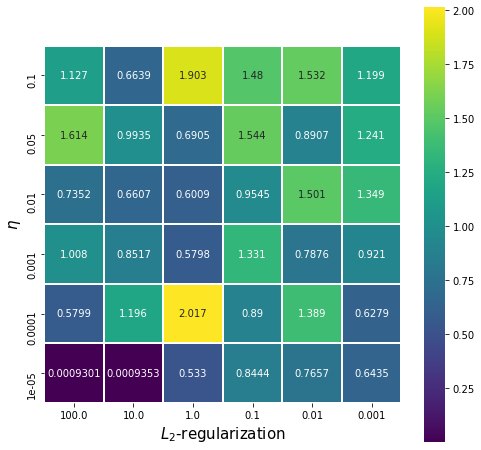

In [56]:
scores_history = pd.DataFrame(
    errors_history_params,
    index=params_grid["learning_rate"],
    columns=params_grid["c"])

fig, axes = plt.subplots(1, 1, figsize=(8, 8))
sns.heatmap(scores_history, cmap="viridis", annot=True, fmt='.4g', linewidths=1, square=True, ax=axes)
axes.set_xlabel("$L_2$-regularization", fontsize=15)
axes.set_ylabel("$\eta$", fontsize=15)

In [ ]:
# Функция потерь -> то, что мы оптимизируем
# Метрика качества -> то, с помощью чего мы оцениваем качество модели

# Примеры
# MSE, MSE
# R2, R2

# Log-Loss
# AUC

# Реальная задача
# Log-Loss
# Бизнес-метрика -> деньги